# Computer Vision - P2

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 22nd, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

In [1]:
pip install imageIO

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

a) Read the image `./images_notebook/oryx.png` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/oryx.jpg">

**Note:** Before applying the histogram, you should pass the image into float.

Image shape: (800, 1200, 3)
Data type: uint8


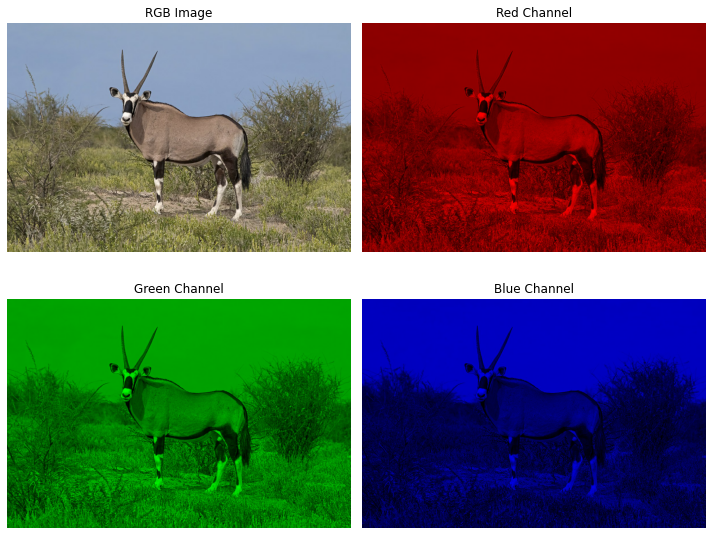

In [3]:
#your solution
# Load image
image = io.imread('./images_notebook/oryx.jpg')

# Print shape and data type
print("Image shape:", image.shape)
print("Data type:", image.dtype)

# Convert to float for histogram
image_float = image.astype(float)

# Plot RGB image
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('RGB Image')
plt.axis('off')

# Plot each channel
colors = ['Red', 'Green', 'Blue']
for i, color in enumerate(colors):
    channel_image = np.zeros_like(image)
    channel_image[..., i] = image[..., i]
    plt.subplot(2, 2, i + 2)
    plt.imshow(channel_image)
    plt.title(f'{color} Channel')
    plt.axis('off')

plt.tight_layout()
plt.show()

b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences (between different channels and different number of bins).

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

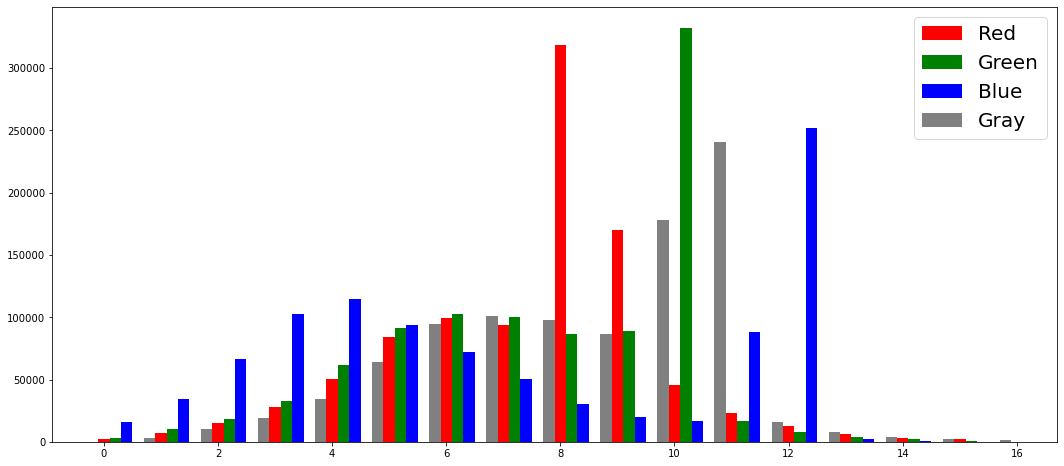

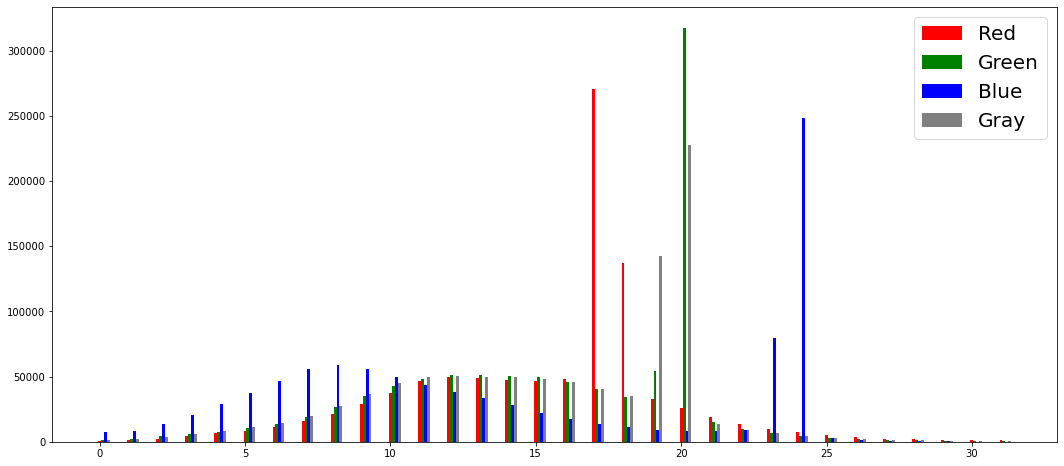

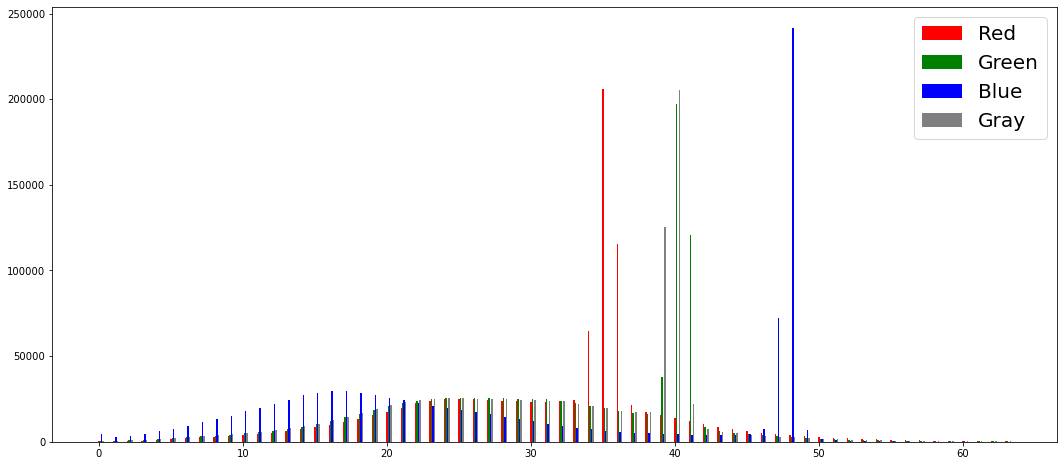

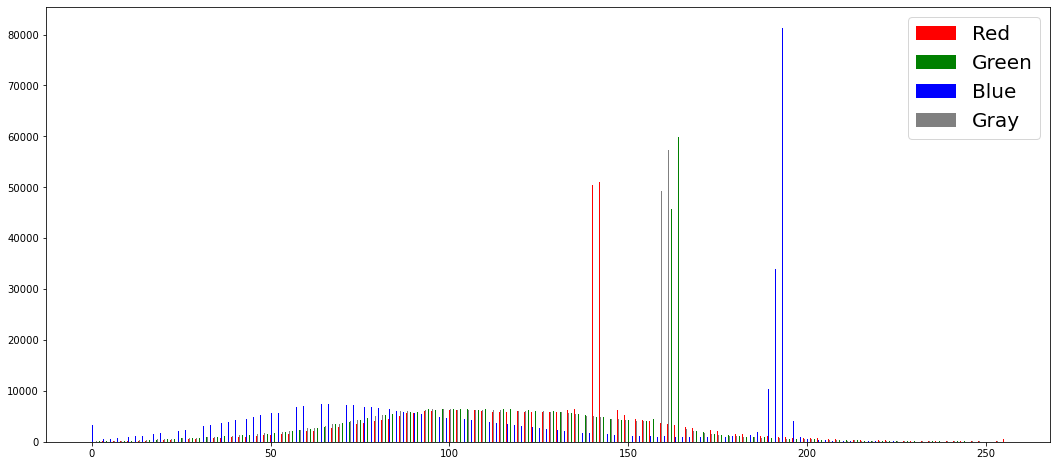

In [4]:
#your solution
from skimage.exposure import histogram
from skimage import img_as_float, io, color
import numpy as np
import matplotlib.pyplot as plt

# Cargar y preparar la imagen
image = io.imread('./images_notebook/oryx.jpg')
image_float = img_as_float(image)
gray_image = color.rgb2gray(image_float)

# Separar los canales de color
r_channel = image_float[..., 0]
g_channel = image_float[..., 1]
b_channel = image_float[..., 2]

# Función para calcular y devolver el histograma
def im_hist(im, nbins=8):
    hist, bins = histogram(im, nbins=nbins)
    return hist, bins

# Cálculo de histogramas para diferentes tamaños de bins
hst_r_16, bins_r_16 = im_hist(r_channel, nbins=16)
hst_g_16, bins_g_16 = im_hist(g_channel, nbins=16)
hst_b_16, bins_b_16 = im_hist(b_channel, nbins=16)
hst_gr_16, bins_gr_16 = im_hist(gray_image, nbins=16)

hst_r_32, bins_r_32 = im_hist(r_channel, nbins=32)
hst_g_32, bins_g_32 = im_hist(g_channel, nbins=32)
hst_b_32, bins_b_32 = im_hist(b_channel, nbins=32)
hst_gr_32, bins_gr_32 = im_hist(gray_image, nbins=32)

hst_r_64, bins_r_64 = im_hist(r_channel, nbins=64)
hst_g_64, bins_g_64 = im_hist(g_channel, nbins=64)
hst_b_64, bins_b_64 = im_hist(b_channel, nbins=64)
hst_gr_64, bins_gr_64 = im_hist(gray_image, nbins=64)

hst_r_256, bins_r_256 = im_hist(r_channel, nbins=256)
hst_g_256, bins_g_256 = im_hist(g_channel, nbins=256)
hst_b_256, bins_b_256 = im_hist(b_channel, nbins=256)
hst_gr_256, bins_gr_256 = im_hist(gray_image, nbins=256)

# Índices para los diferentes histogramas de bins
ind16 = np.arange(16)
ind32 = np.arange(32)
ind64 = np.arange(64)
ind256 = np.arange(256)

# Visualización de histogramas con 16 bins
fig = plt.figure(figsize=(18, 8))
cl_r_16 = plt.bar(ind16, hst_r_16, 0.2, color='r')
cl_g_16 = plt.bar(ind16 + 0.2, hst_g_16, 0.2, color='g')
cl_b_16 = plt.bar(ind16 + 0.4, hst_b_16, 0.2, color='b')
cl_gr_16 = plt.bar(ind16 + 0.8, hst_gr_16, 0.2, color='gray')
plt.legend((cl_r_16[0], cl_g_16[0], cl_b_16[0], cl_gr_16[0]), ('Red', 'Green', 'Blue', 'Gray'), loc=1, prop={'size': 20})
plt.show()

# Repite el mismo patrón para 32, 64 y 256 bins
fig = plt.figure(figsize=(18, 8))
cl_r_32 = plt.bar(ind32, hst_r_32, 0.1, color='r')
cl_g_32 = plt.bar(ind32 + 0.1, hst_g_32, 0.1, color='g')
cl_b_32 = plt.bar(ind32 + 0.2, hst_b_32, 0.1, color='b')
cl_gr_32 = plt.bar(ind32 + 0.3, hst_gr_32, 0.1, color='gray')
plt.legend((cl_r_32[0], cl_g_32[0], cl_b_32[0], cl_gr_32[0]), ('Red', 'Green', 'Blue', 'Gray'), loc=1, prop={'size': 20})
plt.show()

fig = plt.figure(figsize=(18, 8))
cl_r_64 = plt.bar(ind64, hst_r_64, 0.1, color='r')
cl_g_64 = plt.bar(ind64 + 0.1, hst_g_64, 0.1, color='g')
cl_b_64 = plt.bar(ind64 + 0.2, hst_b_64, 0.1, color='b')
cl_gr_64 = plt.bar(ind64 + 0.3, hst_gr_64, 0.1, color='gray')
plt.legend((cl_r_64[0], cl_g_64[0], cl_b_64[0], cl_gr_64[0]), ('Red', 'Green', 'Blue', 'Gray'), loc=1, prop={'size': 20})
plt.show()

fig = plt.figure(figsize=(18, 8))
cl_r_256 = plt.bar(ind256, hst_r_256, 0.1, color='r')
cl_g_256 = plt.bar(ind256 + 0.1, hst_g_256, 0.1, color='g')
cl_b_256 = plt.bar(ind256 + 0.2, hst_b_256, 0.1, color='b')
cl_gr_256 = plt.bar(ind256 + 0.3, hst_gr_256, 0.1, color='gray')
plt.legend((cl_r_256[0], cl_g_256[0], cl_b_256[0], cl_gr_256[0]), ('Red', 'Green', 'Blue', 'Gray'), loc=1, prop={'size': 20})
plt.show()

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_notebook/oryx.png`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `oryx_gray`). We are going to apply:

1. Convolve `oryx_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `oryx_gray` with a transposed version of the mask in (2).
3. Convolve `oryx_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


Horizontal Mask - Max: 0.7350347223754079 Min: 0.07541157475490239 Data type: float64
Vertical Mask - Max: 0.8273817810457407 Min: 0.09361181673813734 Data type: float64
Uniform 2D Mask - Max: 0.6386113880650878 Min: 0.15737006966912034 Data type: float64


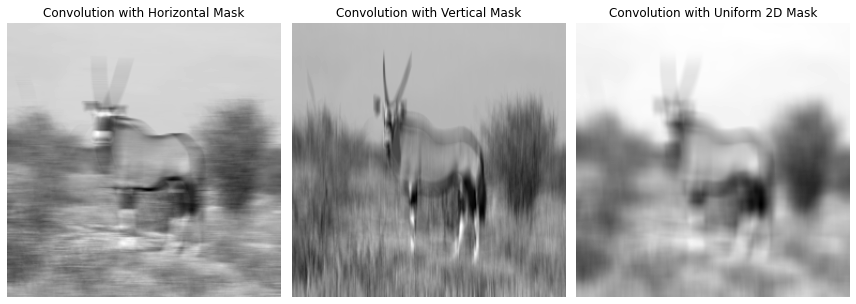

In [5]:
#your solution

from skimage import io, color, transform
from scipy import ndimage
import numpy as np

# Cargar y preparar la imagen
image = io.imread('./images_notebook/oryx.jpg')
image_resized = transform.resize(image, (256, 256), anti_aliasing=True)
oryx_gray = color.rgb2gray(image_resized)

# Definir las máscaras y normalizarlas
mask_h1d = np.array([[1] * 15], dtype=float)
mask_h1d /= mask_h1d.sum()

mask_v1d = mask_h1d.T  # Transposición de la máscara horizontal
mask_2d = np.ones((15, 15), dtype=float)
mask_2d /= mask_2d.sum()

# Convoluciones con cada máscara
conv_h1d = ndimage.convolve(oryx_gray, mask_h1d)
conv_v1d = ndimage.convolve(oryx_gray, mask_v1d)
conv_2d = ndimage.convolve(oryx_gray, mask_2d)

# Verificar valores máximo, mínimo y tipo de datos de cada imagen
print("Horizontal Mask - Max:", conv_h1d.max(), "Min:", conv_h1d.min(), "Data type:", conv_h1d.dtype)
print("Vertical Mask - Max:", conv_v1d.max(), "Min:", conv_v1d.min(), "Data type:", conv_v1d.dtype)
print("Uniform 2D Mask - Max:", conv_2d.max(), "Min:", conv_2d.min(), "Data type:", conv_2d.dtype)

# Visualización opcional
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(conv_h1d, cmap='gray')
plt.title('Convolution with Horizontal Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(conv_v1d, cmap='gray')
plt.title('Convolution with Vertical Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(conv_2d, cmap='gray')
plt.title('Convolution with Uniform 2D Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

b) Visualize the four images, `oryx_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


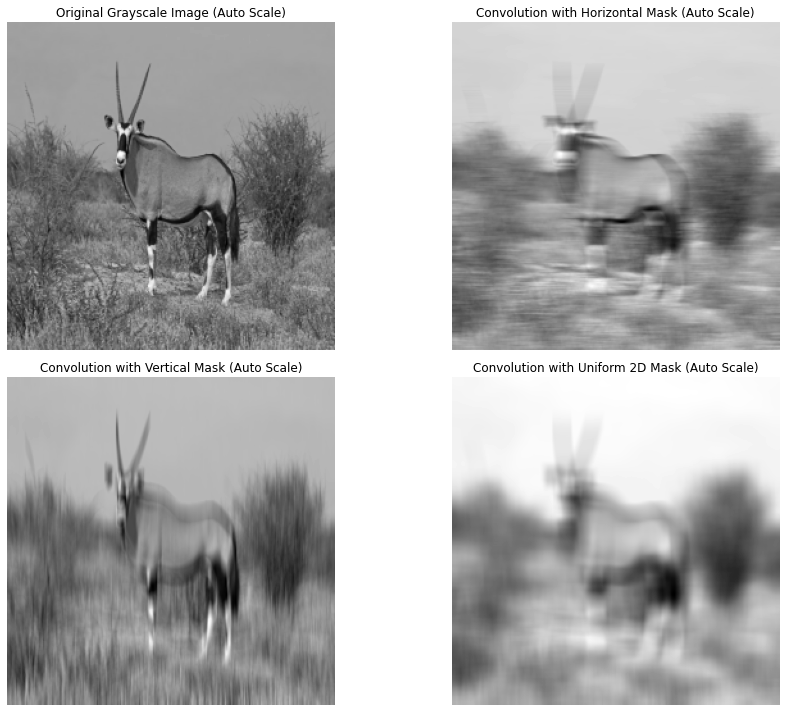

In [6]:
#your solution
from skimage import io, color, transform
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

# Cargar y preparar la imagen en escala de grises
image = io.imread('./images_notebook/oryx.jpg')
image_resized = transform.resize(image, (256, 256), anti_aliasing=True)
oryx_gray = color.rgb2gray(image_resized)

# Definir las máscaras y normalizarlas
mask_h1d = np.array([[1] * 15], dtype=float)
mask_h1d /= mask_h1d.sum()

mask_v1d = mask_h1d.T  # Transposición de la máscara horizontal
mask_2d = np.ones((15, 15), dtype=float)
mask_2d /= mask_2d.sum()

# Convoluciones con cada máscara
conv_h1d = ndimage.convolve(oryx_gray, mask_h1d)
conv_v1d = ndimage.convolve(oryx_gray, mask_v1d)
conv_2d = ndimage.convolve(oryx_gray, mask_2d)

# Visualización de las imágenes en una figura única con escalado automático
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.imshow(oryx_gray, cmap='gray')
plt.title('Original Grayscale Image (Auto Scale)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(conv_h1d, cmap='gray')
plt.title('Convolution with Horizontal Mask (Auto Scale)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(conv_v1d, cmap='gray')
plt.title('Convolution with Vertical Mask (Auto Scale)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(conv_2d, cmap='gray')
plt.title('Convolution with Uniform 2D Mask (Auto Scale)')
plt.axis('off')
plt.tight_layout()
plt.show()


c) Can we convolve a color (RGB) image? 

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `oryx.png` image to $256x256$ pixels and try your funcion, using a 7x7 uniform mask.


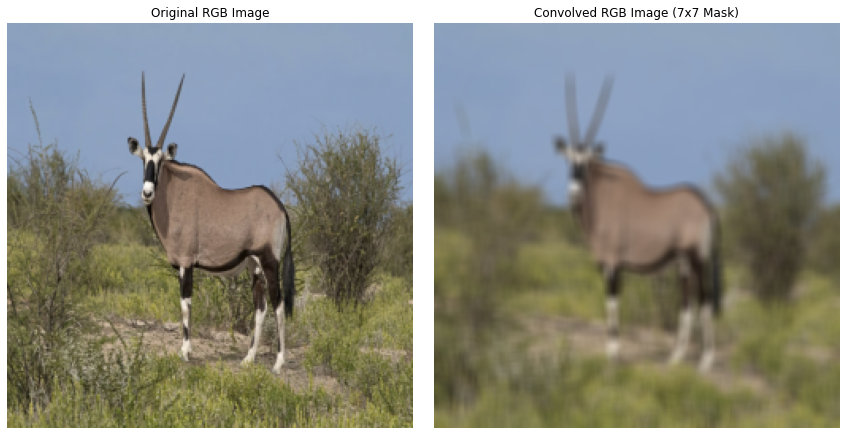

In [7]:
#your solution
from skimage import io, transform, img_as_float
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

# Cargar y preparar la imagen RGB
image = io.imread('./images_notebook/oryx.jpg')
image_resized = transform.resize(image, (256, 256), anti_aliasing=True)
image_resized = img_as_float(image_resized)  # Convertir a flotante para preservar intensidades

# Definir la función de convolución para imágenes en color
def conv_color(image, mask):
    # Aplicar convolución a cada canal individualmente
    convolved_channels = [ndimage.convolve(image[..., i], mask) for i in range(3)]
    # Reunir los canales en una imagen
    return np.stack(convolved_channels, axis=-1)

# Definir y normalizar la máscara uniforme de 7x7
mask_7x7 = np.ones((7, 7), dtype=float)
mask_7x7 /= mask_7x7.sum()

# Aplicar la función conv_color con la máscara 7x7
conv_image = conv_color(image_resized, mask_7x7)

# Visualización de la imagen original y la imagen convolucionada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_resized)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(conv_image)
plt.title('Convolved RGB Image (7x7 Mask)')
plt.axis('off')
plt.tight_layout()
plt.show()

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `oryx_gray` 20 times, and check the histogram (i.e. nbins = 32)
2. Augment `oryx_gray` 20 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.


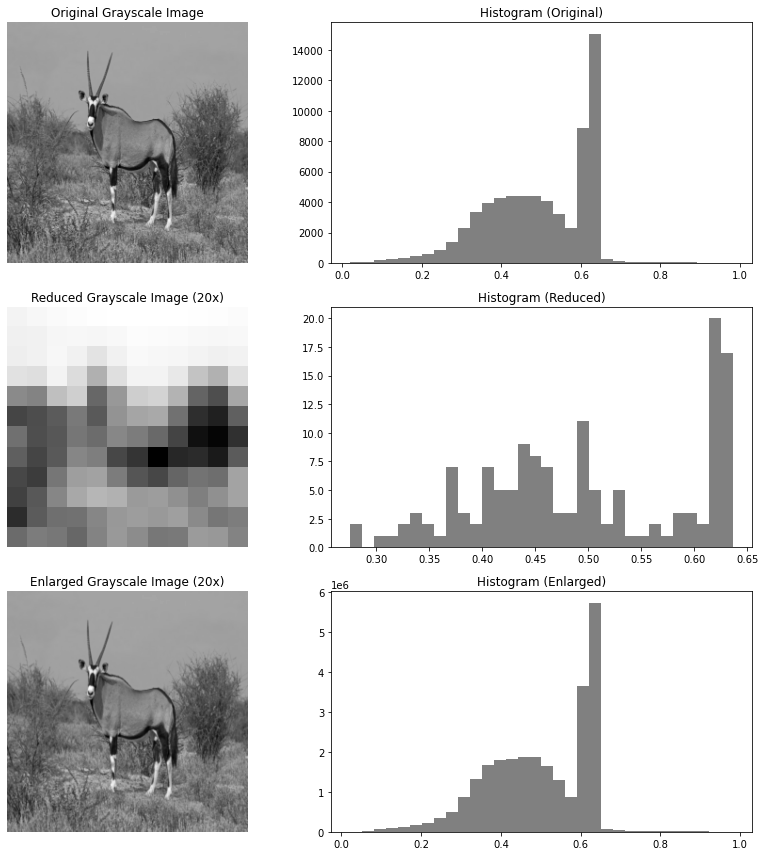

In [8]:
from skimage import io, color, transform
from skimage.exposure import histogram
import numpy as np
import matplotlib.pyplot as plt

# Cargar y preparar la imagen en escala de grises
image = io.imread('./images_notebook/oryx.jpg')
image_resized = transform.resize(image, (256, 256), anti_aliasing=True)
oryx_gray = color.rgb2gray(image_resized)

# Reducción y ampliación de la imagen 20 veces
oryx_gray_reduced = transform.resize(oryx_gray, (oryx_gray.shape[0] // 20, oryx_gray.shape[1] // 20), anti_aliasing=True)
oryx_gray_enlarged = transform.resize(oryx_gray, (oryx_gray.shape[0] * 20, oryx_gray.shape[1] * 20), anti_aliasing=True)

# Visualización de las imágenes y sus histogramas con plt.hist
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Imagen original y su histograma
axes[0, 0].imshow(oryx_gray, cmap='gray')
axes[0, 0].set_title('Original Grayscale Image')
axes[0, 0].axis('off')
axes[0, 1].hist(oryx_gray.ravel(), bins=32, color='gray')
axes[0, 1].set_title('Histogram (Original)')

# Imagen reducida y su histograma
axes[1, 0].imshow(oryx_gray_reduced, cmap='gray')
axes[1, 0].set_title('Reduced Grayscale Image (20x)')
axes[1, 0].axis('off')
axes[1, 1].hist(oryx_gray_reduced.ravel(), bins=32, color='gray')
axes[1, 1].set_title('Histogram (Reduced)')

# Imagen aumentada y su histograma
axes[2, 0].imshow(oryx_gray_enlarged, cmap='gray')
axes[2, 0].set_title('Enlarged Grayscale Image (20x)')
axes[2, 0].axis('off')
axes[2, 1].hist(oryx_gray_enlarged.ravel(), bins=32, color='gray')
axes[2, 1].set_title('Histogram (Enlarged)')

plt.tight_layout()
plt.show()


b) Apply a convolution (7x7 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `oryx_gray`image and calculate its histogram.
2. Convolve the reduced `oryx_gray` image 20 times and calculate its histogram.
3. Convolve the augmented `oryx_gray` image 20 times and calculate its histogram.

Comment what happens and why.

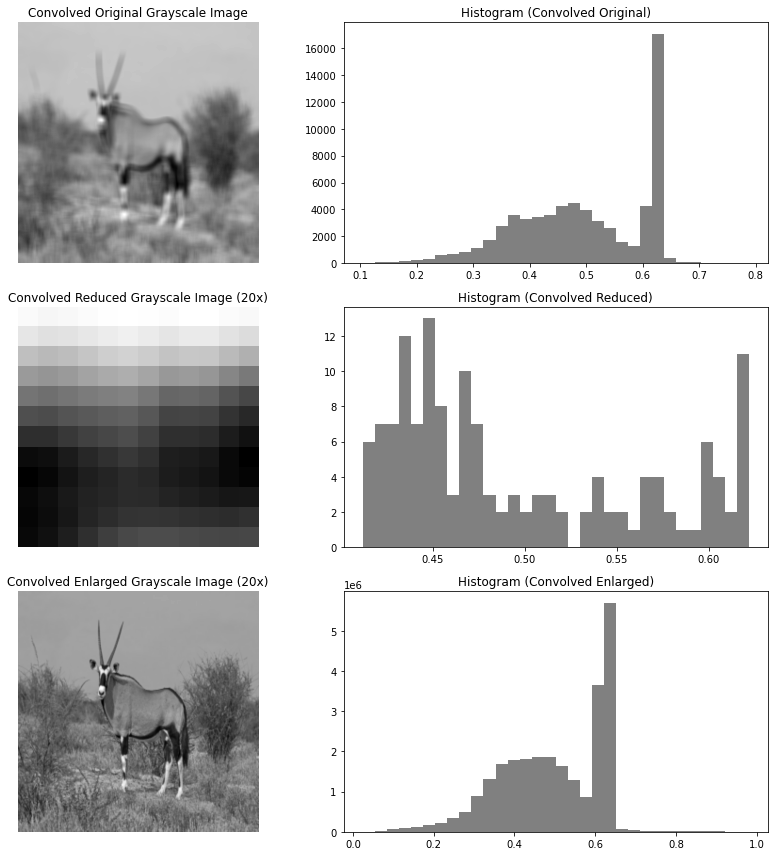

In [9]:
#your solution
from skimage import io, color, transform, img_as_float
from scipy import ndimage
import matplotlib.pyplot as plt

# Cargar y preparar la imagen en escala de grises
image = io.imread('./images_notebook/oryx.jpg')
image_resized = transform.resize(image, (256, 256), anti_aliasing=True)
oryx_gray = img_as_float(color.rgb2gray(image_resized))

# Reducción y ampliación de la imagen 20 veces
oryx_gray_reduced = transform.resize(oryx_gray, (oryx_gray.shape[0] // 20, oryx_gray.shape[1] // 20), anti_aliasing=True)
oryx_gray_enlarged = transform.resize(oryx_gray, (oryx_gray.shape[0] * 20, oryx_gray.shape[1] * 20), anti_aliasing=True)

# Definir y normalizar la máscara de convolución 7x7
mask_7x7 = np.ones((7, 7), dtype=float) / 49  # Normalización para que la suma sea 1

# Aplicar la convolución a cada imagen
conv_original = ndimage.convolve(oryx_gray, mask_7x7)
conv_reduced = ndimage.convolve(oryx_gray_reduced, mask_7x7)
conv_enlarged = ndimage.convolve(oryx_gray_enlarged, mask_7x7)

# Visualizar las imágenes convolucionadas y sus histogramas
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Imagen original convolucionada y su histograma
axes[0, 0].imshow(conv_original, cmap='gray')
axes[0, 0].set_title('Convolved Original Grayscale Image')
axes[0, 0].axis('off')
axes[0, 1].hist(conv_original.ravel(), bins=32, color='gray')
axes[0, 1].set_title('Histogram (Convolved Original)')

# Imagen reducida convolucionada y su histograma
axes[1, 0].imshow(conv_reduced, cmap='gray')
axes[1, 0].set_title('Convolved Reduced Grayscale Image (20x)')
axes[1, 0].axis('off')
axes[1, 1].hist(conv_reduced.ravel(), bins=32, color='gray')
axes[1, 1].set_title('Histogram (Convolved Reduced)')

# Imagen ampliada convolucionada y su histograma
axes[2, 0].imshow(conv_enlarged, cmap='gray')
axes[2, 0].set_title('Convolved Enlarged Grayscale Image (20x)')
axes[2, 0].axis('off')
axes[2, 1].hist(conv_enlarged.ravel(), bins=32, color='gray')
axes[2, 1].set_title('Histogram (Convolved Enlarged)')

plt.tight_layout()
plt.show()

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `oryx_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with 3 different sigma values. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter with different mask shapes: disk, rectangle, and diamond. What is the effect of using different kinds of filters on the original image?

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

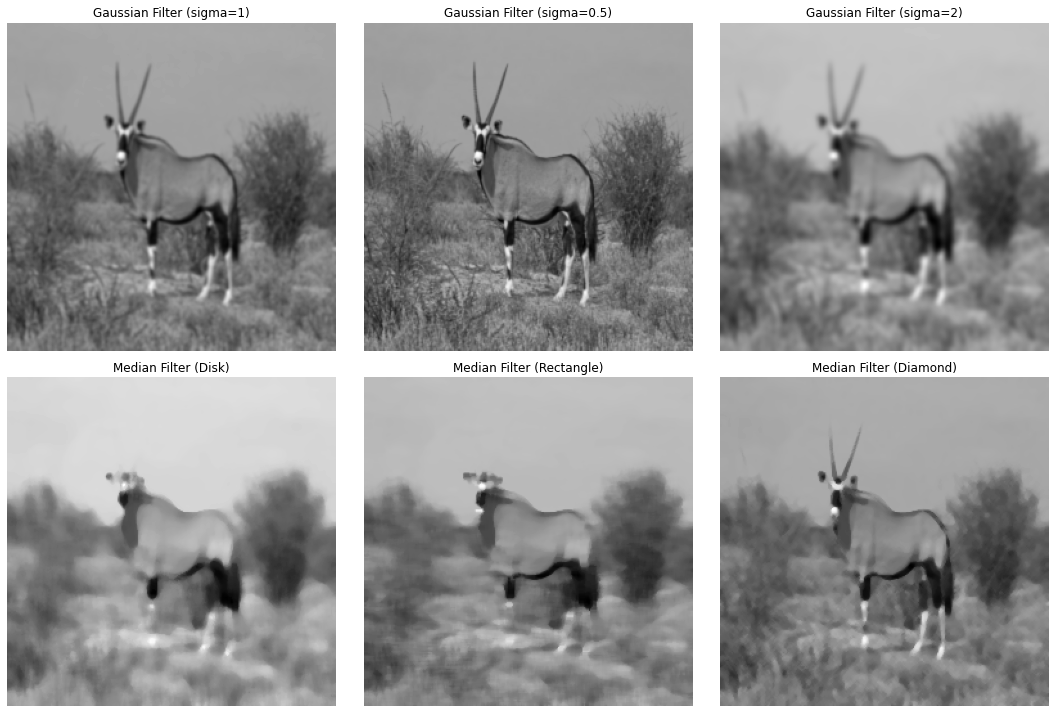

In [10]:
from skimage import io, color, transform, filters, morphology
from scipy.ndimage import gaussian_filter, median_filter
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen que subiste
image = io.imread('./images_notebook/oryx.jpg')
image_resized = transform.resize(image, (256, 256), anti_aliasing=True)
oryx_gray = color.rgb2gray(image_resized)

# Aplicar kernel Gaussiano con sigma = 1
gaussian_sigma1 = gaussian_filter(oryx_gray, sigma=1)

# Aplicar kernel Gaussiano con 3 diferentes valores de sigma
sigma_values = [0.5, 2, 3]
gaussian_results = [gaussian_filter(oryx_gray, sigma=sigma) for sigma in sigma_values]

# Aplicar filtro de mediana con diferentes formas de máscara: disco, rectángulo y diamante
median_disk = median_filter(oryx_gray, footprint=morphology.disk(5))
median_rectangle = median_filter(oryx_gray, size=(5, 10))  # Rectángulo de 5x10
median_diamond = median_filter(oryx_gray, footprint=morphology.diamond(3))

# Visualización de los resultados (sin los cuadros vacíos)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Filtros Gaussianos con diferentes sigma
axes[0, 0].imshow(gaussian_sigma1, cmap='gray')
axes[0, 0].set_title('Gaussian Filter (sigma=1)')
axes[0, 0].axis('off')

axes[0, 1].imshow(gaussian_results[0], cmap='gray')
axes[0, 1].set_title('Gaussian Filter (sigma=0.5)')
axes[0, 1].axis('off')

axes[0, 2].imshow(gaussian_results[1], cmap='gray')
axes[0, 2].set_title('Gaussian Filter (sigma=2)')
axes[0, 2].axis('off')

# Filtros de Mediana con diferentes formas de máscara
axes[1, 0].imshow(median_disk, cmap='gray')
axes[1, 0].set_title('Median Filter (Disk)')
axes[1, 0].axis('off')

axes[1, 1].imshow(median_rectangle, cmap='gray')
axes[1, 1].set_title('Median Filter (Rectangle)')
axes[1, 1].axis('off')

axes[1, 2].imshow(median_diamond, cmap='gray')
axes[1, 2].set_title('Median Filter (Diamond)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

b) **(Optional)** Apply the smoothing on some other images and present their results.

In [11]:
#your solution

### 2.5 Determine the optimal contour 

a) Load the 'logo_pozo.jpg' image and visualize its contours.	

<img src="images_notebook/logo_pozo.jpg" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

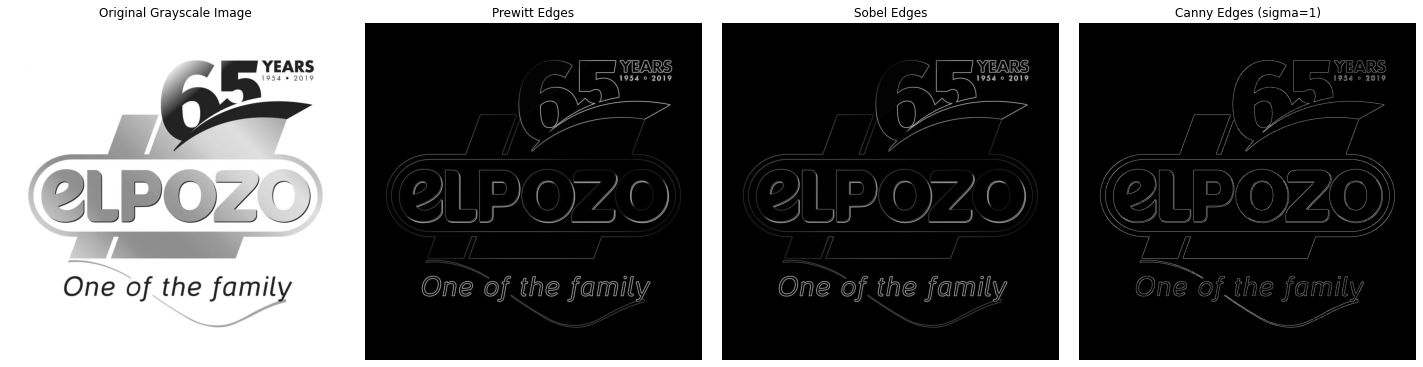

In [12]:
import warnings
warnings.filterwarnings("ignore")

"""Your Solution"""
from skimage import io, color, filters, feature
import matplotlib.pyplot as plt

# Cargar la imagen y convertir a escala de grises
image = io.imread('./images_notebook/logo_pozo.jpg')
gray_image = color.rgb2gray(image)

# Aplicar el filtro de contorno Prewitt
edges_prewitt = filters.prewitt(gray_image)

# Aplicar el filtro de contorno Sobel
edges_sobel = filters.sobel(gray_image)

# Aplicar el filtro de contorno Canny con diferentes parámetros de sigma
edges_canny = feature.canny(gray_image, sigma=1)  # Puedes ajustar sigma para observar diferentes resultados

# Visualización de los resultados en subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Imagen original
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

# Contornos con Prewitt
axes[1].imshow(edges_prewitt, cmap='gray')
axes[1].set_title('Prewitt Edges')
axes[1].axis('off')

# Contornos con Sobel
axes[2].imshow(edges_sobel, cmap='gray')
axes[2].set_title('Sobel Edges')
axes[2].axis('off')

# Contornos con Canny
axes[3].imshow(edges_canny, cmap='gray')
axes[3].set_title('Canny Edges (sigma=1)')
axes[3].axis('off')

plt.tight_layout()
plt.show()



In [13]:
'''
¿Cuál es la mejor técnica de detección de contornos?: Depende de la imagen y de los detalles que quieras capturar. Generalmente, Canny suele ser más robusto y preciso, especialmente en imágenes con ruido.
'''

'''
¿Cuáles son los parámetros óptimos para esta imagen?: Para el filtro Canny, sigma=1 es un buen punto de partida, pero puedes probar valores entre 0.5 y 2 para ajustar la sensibilidad.
'''

'''
¿Es necesario normalizar la máscara?: No, en este caso no es necesario normalizar la máscara, ya que la detección de contornos se basa en detectar cambios de intensidad y no en suavizar la imagen.
'''

'\n¿Es necesario normalizar la máscara?: No, en este caso no es necesario normalizar la máscara, ya que la detección de contornos se basa en detectar cambios de intensidad y no en suavizar la imagen.\n'

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? 
- Which are the limitations of the different images contour extraction?

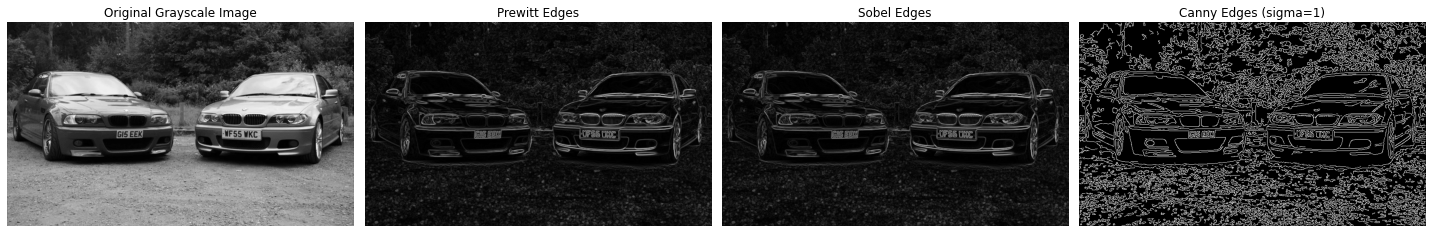

In [14]:
#your solution
import warnings
warnings.filterwarnings("ignore")

"""Your Solution"""
from skimage import io, color, filters, feature
import matplotlib.pyplot as plt

# Cargar la imagen y convertir a escala de grises
image = io.imread('./images_notebook/car.png')
gray_image = color.rgb2gray(image)

# Aplicar el filtro de contorno Prewitt
edges_prewitt = filters.prewitt(gray_image)

# Aplicar el filtro de contorno Sobel
edges_sobel = filters.sobel(gray_image)

# Aplicar el filtro de contorno Canny con diferentes parámetros de sigma
edges_canny = feature.canny(gray_image, sigma=1)  # Puedes ajustar sigma para observar diferentes resultados

# Visualización de los resultados en subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Imagen original
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

# Contornos con Prewitt
axes[1].imshow(edges_prewitt, cmap='gray')
axes[1].set_title('Prewitt Edges')
axes[1].axis('off')

# Contornos con Sobel
axes[2].imshow(edges_sobel, cmap='gray')
axes[2].set_title('Sobel Edges')
axes[2].axis('off')

# Contornos con Canny
axes[3].imshow(edges_canny, cmap='gray')
axes[3].set_title('Canny Edges (sigma=1)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

c) Apply the Sobel and Prewwit filters using the `convolve` function instead of the `skimage.filters` package. Compare the results.


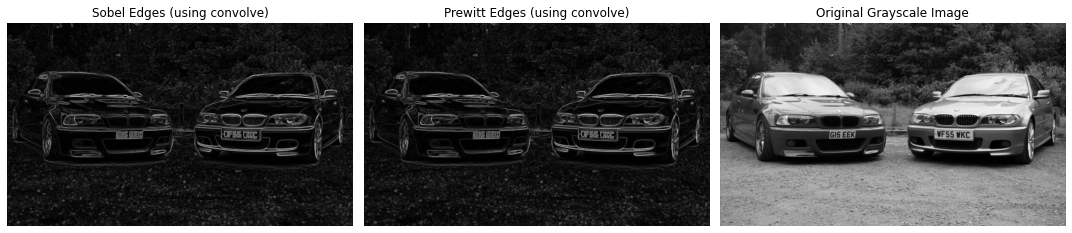

In [15]:
#your solution
from skimage import io, color
from scipy.ndimage import convolve
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen y convertir a escala de grises
image = io.imread('./images_notebook/car.png')
gray_image = color.rgb2gray(image)

# Definir las máscaras de Sobel
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# Aplicar el filtro Sobel usando convolve
sobel_x_conv = convolve(gray_image, sobel_x)
sobel_y_conv = convolve(gray_image, sobel_y)
edges_sobel_conv = np.hypot(sobel_x_conv, sobel_y_conv)  # Magnitud del gradiente

# Definir las máscaras de Prewitt
prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

# Aplicar el filtro Prewitt usando convolve
prewitt_x_conv = convolve(gray_image, prewitt_x)
prewitt_y_conv = convolve(gray_image, prewitt_y)
edges_prewitt_conv = np.hypot(prewitt_x_conv, prewitt_y_conv)  # Magnitud del gradiente

# Visualización de los resultados
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Contornos con Sobel usando convolve
axes[0].imshow(edges_sobel_conv, cmap='gray')
axes[0].set_title('Sobel Edges (using convolve)')
axes[0].axis('off')

# Contornos con Prewitt usando convolve
axes[1].imshow(edges_prewitt_conv, cmap='gray')
axes[1].set_title('Prewitt Edges (using convolve)')
axes[1].axis('off')

# Imagen original para comparación
axes[2].imshow(gray_image, cmap='gray')
axes[2].set_title('Original Grayscale Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/messi.jpg` and `./images_notebook/cr.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

![messi](images_notebook/Messi.png) 

![cr](images_notebook/CR.png)


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

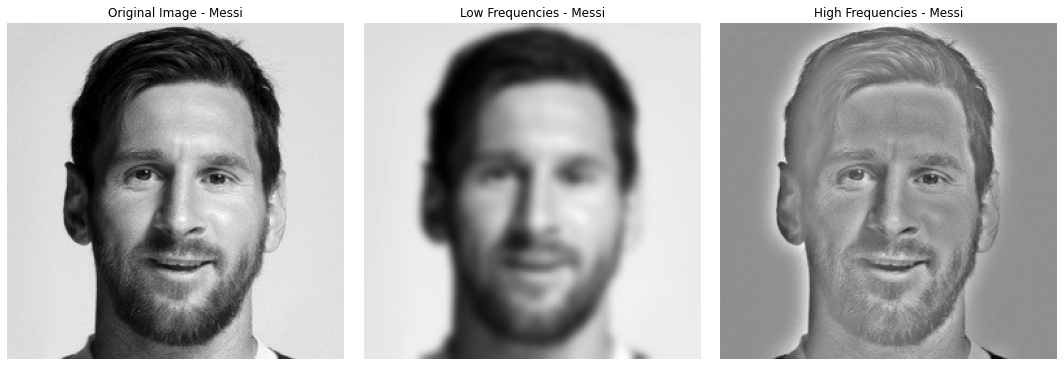

In [16]:
from skimage import io, color
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Cargar la imagen de Messi y convertir a escala de grises
image_messi = io.imread('./images_notebook/messi.jpg')
image_messi_gray = color.rgb2gray(image_messi)

# Definir los valores de sigma para filtros de paso bajo y paso alto
sigma_low = 3  # Para el filtro de paso bajo (suavizado)
sigma_high = 8  # Para el filtro de paso alto

# Filtro de paso bajo para Messi
low_messi = gaussian_filter(image_messi_gray, sigma=sigma_low)

# Filtro de paso alto para Messi (restando el paso bajo de la imagen original)
high_messi = image_messi_gray - gaussian_filter(image_messi_gray, sigma=sigma_high)

# Visualización de los resultados de Messi
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Imagen original, bajas frecuencias y altas frecuencias
axes[0].imshow(image_messi_gray, cmap='gray')
axes[0].set_title('Original Image - Messi')
axes[0].axis('off')

axes[1].imshow(low_messi, cmap='gray')
axes[1].set_title('Low Frequencies - Messi')
axes[1].axis('off')

axes[2].imshow(high_messi, cmap='gray')
axes[2].set_title('High Frequencies - Messi')
axes[2].axis('off')

plt.tight_layout()
plt.show()

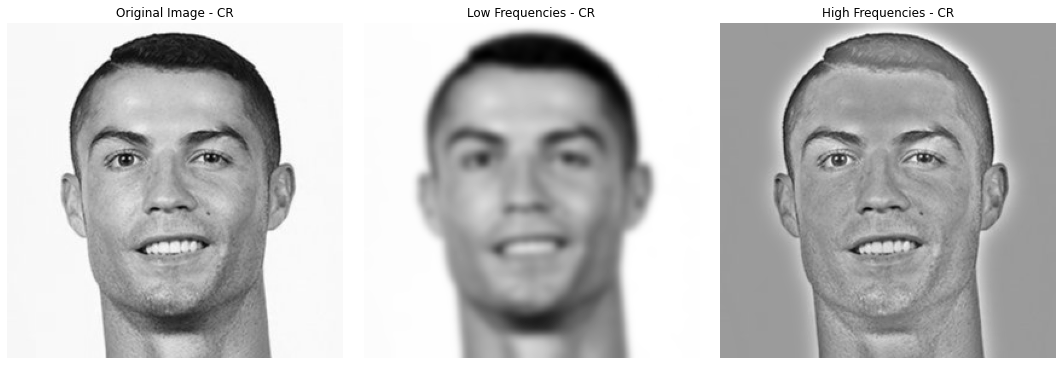

In [17]:
#your solution
# Cargar la imagen de Cristiano y convertir a escala de grises
image_cr = io.imread('./images_notebook/cr.jpg')
image_cr_gray = color.rgb2gray(image_cr)

# Filtro de paso bajo para Cristiano
low_cr = gaussian_filter(image_cr_gray, sigma=sigma_low)

# Filtro de paso alto para Cristiano (restando el paso bajo de la imagen original)
high_cr = image_cr_gray - gaussian_filter(image_cr_gray, sigma=sigma_high)

# Visualización de los resultados de Cristiano
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Imagen original, bajas frecuencias y altas frecuencias
axes[0].imshow(image_cr_gray, cmap='gray')
axes[0].set_title('Original Image - CR')
axes[0].axis('off')

axes[1].imshow(low_cr, cmap='gray')
axes[1].set_title('Low Frequencies - CR')
axes[1].axis('off')

axes[2].imshow(high_cr, cmap='gray')
axes[2].set_title('High Frequencies - CR')
axes[2].axis('off')

plt.tight_layout()
plt.show()


b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Messi's face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png">


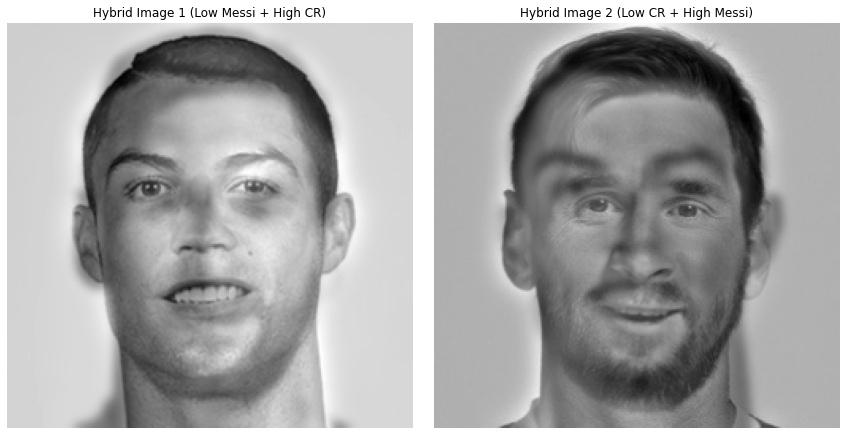

In [18]:
from skimage import io, color, transform
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Cargar las imágenes y redimensionarlas a un tamaño común (por ejemplo, 256x256)
image_messi = io.imread('./images_notebook/messi.jpg')
image_cr = io.imread('./images_notebook/cr.jpg')
common_size = (256, 256)
image_messi_resized = transform.resize(image_messi, common_size, anti_aliasing=True)
image_cr_resized = transform.resize(image_cr, common_size, anti_aliasing=True)

# Convertir las imágenes redimensionadas a escala de grises
image_messi_gray = color.rgb2gray(image_messi_resized)
image_cr_gray = color.rgb2gray(image_cr_resized)

# Definir los valores de sigma para el filtro de paso bajo y paso alto
sigma_low = 3  # Para el filtro de paso bajo
sigma_high = 8  # Para el filtro de paso alto

# Aplicar el filtro de paso bajo a cada imagen
low_messi = gaussian_filter(image_messi_gray, sigma=sigma_low)
low_cr = gaussian_filter(image_cr_gray, sigma=sigma_low)

# Aplicar el filtro de paso alto a cada imagen (restando el paso bajo de la imagen original)
high_messi = image_messi_gray - gaussian_filter(image_messi_gray, sigma=sigma_high)
high_cr = image_cr_gray - gaussian_filter(image_cr_gray, sigma=sigma_high)

# Crear las imágenes híbridas
hybrid1 = low_messi + high_cr  # Frecuencias bajas de Messi + frecuencias altas de CR
hybrid2 = low_cr + high_messi  # Frecuencias bajas de CR + frecuencias altas de Messi

# Visualización de ambas imágenes híbridas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Imagen híbrida 1
axes[0].imshow(hybrid1, cmap='gray')
axes[0].set_title('Hybrid Image 1 (Low Messi + High CR)')
axes[0].axis('off')

# Imagen híbrida 2
axes[1].imshow(hybrid2, cmap='gray')
axes[1].set_title('Hybrid Image 2 (Low CR + High Messi)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 2.7 Anonimization of sensitive information

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of sensitive information appearing in the images.
For example, it is common in applications like Google Street View, where the faces and license plates are anonymized.
The file `./images_notebook/car.png` contains two cars. Anonimize the license plates of the cars using the techniques learned in this practicum.

Modify only the license plates of the cars, keeping the rest of the image unchanged.

![car](images_notebook/car.png)

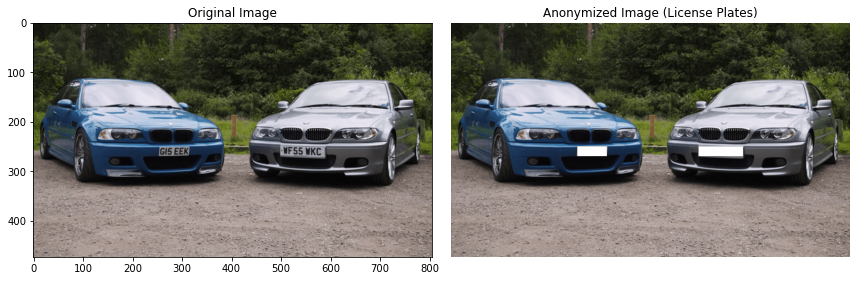

In [22]:
from skimage import io, filters
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen
image = io.imread('./images_notebook/car.png')

# Definir las coordenadas aproximadas de las placas (inicio, fin) corresponden al formato (eje Y, eje X)
plate_coords = [
    ((250, 255), (270, 315)),  # Coordenadas de la placa del primer auto (izquierda)
    ((250, 500), (270, 590))   # Coordenadas de la placa del segundo auto (derecha)
]

# Crear una copia de la imagen original para editar
anonymized_image = np.copy(image)

# Aplicar desenfoque a las áreas de las placas
for (start, end) in plate_coords:
    r_start, c_start = start
    r_end, c_end = end
    plate_region = anonymized_image[r_start:r_end, c_start:c_end]
    
    # Desenfoque aplicado solo a la región de la placa
    anonymized_image[r_start:r_end, c_start:c_end] = filters.gaussian(plate_region, sigma=10, multichannel=True)

# Visualización de la imagen original y la imagen anonimizada
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("on")

axes[1].imshow(anonymized_image)
axes[1].set_title("Anonymized Image (License Plates)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


In [24]:
'''
En este ejercicio final en la linea: anonymized_image[r_start:r_end, c_start:c_end] = filters.gaussian(plate_region, sigma=10, multichannel=True)
Puede no funcionar y deberia quedarse asi anonymized_image[r_start:r_end, c_start:c_end] = filters.gaussian(plate_region, sigma=10, channel_axis=-1) 
dependiendo de que version de python se use
'''

'\nEn este ejercicio final en la linea: anonymized_image[r_start:r_end, c_start:c_end] = filters.gaussian(plate_region, sigma=10, multichannel=True)\nPuede no funcionar y deberia quedarse asi anonymized_image[r_start:r_end, c_start:c_end] = filters.gaussian(plate_region, sigma=10, channel_axis=-1) \ndependiendo de que version de python se use\n'